# RBM-GG 

Gaussian - Gaussian  

1. Preprocessing data
- Normalize the data to mean = 0, sig = 1
- Use fixed sigma = 1

2. Dynamic sigma
- Normalize the data as usual
- Update sigma from the CDk algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os

In [2]:
data_dir = '../../../paperstudy/RBM/datas/'

In [3]:
sys.path.append('../')
import RBM as rbm

## Load data

In [4]:
model = rbm.test.GGRBM
mnist_train_data = data_dir + "mnist_train.csv"
mnist_test_data = data_dir + "mnist_test.csv"

training_data_file = open(mnist_train_data, 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [5]:
# number of data
print('number of training data', len(training_data_list))

number of training data 60000


## Preprocessing

In [6]:
n_data_train = 5000

n_x = 784 # input vector size

x_train = np.zeros((n_data_train, n_x))
for i, data in enumerate(training_data_list[:n_data_train]):
    data = data.split(',')
    # Normalize mean=0, sig=1
    data = np.asfarray(data[1:])/255.
    x_mean = np.mean(data)
    x_sig = np.std(data)
    x_train[i] = (data - x_mean)/x_sig

In [7]:
np.mean(x_train)

2.498681533789026e-18

In [8]:
np.std(x_train)

0.9999999999999998

In [9]:
np.min(x_train)

-0.7091296661417569

In [10]:
np.max(x_train)

6.674641888683865

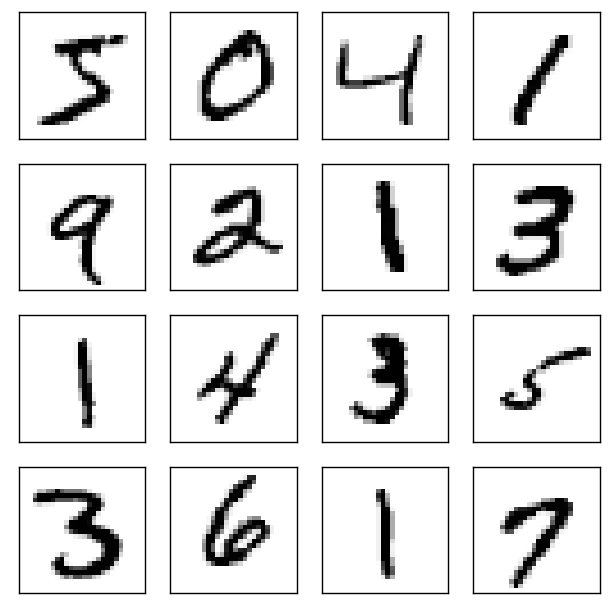

In [11]:
f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
        ax[i,j].imshow(x_train[ind].reshape(28,28), cmap='Greys')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

## Define RBM

In [12]:
model = rbm.test.GGRBM(n_x, 10, 1., 1.)

In [ ]:
model.fit(x_train,0.0001,3000) # fixed sig

0 2.011457050735783
1 1.9492881405132834


In [ ]:
plt.plot(np.arange(len(model.history['loss'])),model.history['loss'])

In [ ]:
pred, hid = model.reconstruct(x_train[0:16])

f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
#         ax[i,j].imshow(pred[ind].reshape(28,28), vmin=-1, vmax=1, cmap='Greys')
        ax[i,j].imshow(pred[ind].reshape(28,28), cmap='Greys')
        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

In [ ]:
hid[0]# pattern
f, ax = plt.subplots(2,5, dpi=125, figsize=(5,5))

for i in range(2):
    for j in range(5):
        ind = i*5 + j
#         ax[i,j].imshow(model.w.T[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].imshow(model.w.T[ind].reshape(28,28), cmap='Greys')

        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

In [ ]:
plt.plot(np.arange(len(model.history['sig_v'])),model.history['sig_v'])

In [ ]:
plt.plot(np.arange(len(model.history['sig_h'])),model.history['sig_h'])

## Define RBM dynamic sigma

In [ ]:
model = rbm.test.GGRBM(n_x, 10, 1., 1.)

In [ ]:
model.fit(x_train,0.0001,100, 10) # fixed sig

In [ ]:
plt.plot(np.arange(len(model.history['loss'])),model.history['loss'])

In [ ]:
pred, hid = model.reconstruct(x_train[0:16])

f, ax = plt.subplots(4,4, dpi=125, figsize=(5,5))

for i in range(4):
    for j in range(4):
        ind = i*4 + j
#         ax[i,j].imshow(pred[ind].reshape(28,28), vmin=-1, vmax=1, cmap='Greys')
        ax[i,j].imshow(pred[ind].reshape(28,28), cmap='Greys')
        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

In [ ]:
hid[0]# pattern
f, ax = plt.subplots(2,5, dpi=125, figsize=(5,5))

for i in range(2):
    for j in range(5):
        ind = i*5 + j
#         ax[i,j].imshow(model.w.T[ind].reshape(28,28), vmin=0, vmax=1, cmap='Greys')
        ax[i,j].imshow(model.w.T[ind].reshape(28,28), cmap='Greys')

        ax[i,j].set_xlabel(ind)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
f.tight_layout()

In [ ]:
plt.plot(np.arange(len(model.history['sig_v'])),model.history['sig_v'])

In [ ]:
plt.plot(np.arange(len(model.history['sig_h'])),model.history['sig_h'])